In [1]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import style

In [2]:
import pandas as pd
df = pd.read_csv("rideshare_kaggle.csv")


In [8]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [9]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [12]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


### Data Preprocessing and visualization

In [13]:
df["price"] = df["price"].fillna(value=np.mean(df["price"]))


In [14]:
df["START_DATE"] = pd.to_datetime(df['datetime'], format='%Y/%m/%d %H:%M')


In [15]:
df['HOURS'] = [x.hour for x in df['START_DATE']]
df['DAY'] = [x.day for x in df['START_DATE']]
df['MONTH'] = [x.month for x in df['START_DATE']]
df['DAY_OF_WEEK'] = [x.day_of_week for x in df['START_DATE']]
df["WEEKDAY"] = [calendar.day_name[x.day_of_week] for x in df['START_DATE']]


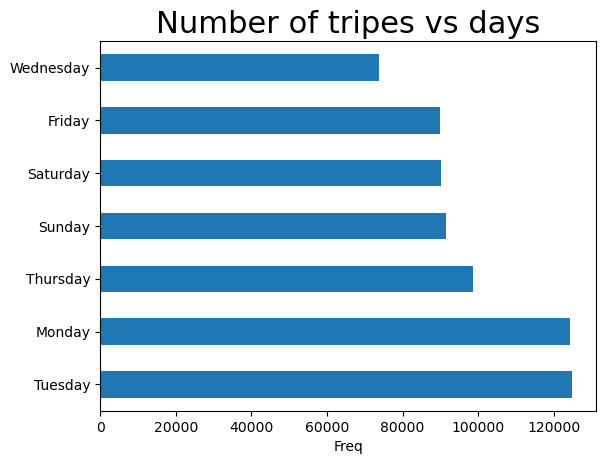

In [16]:
df["WEEKDAY"].value_counts().plot(kind='barh')
plt.xlabel("Freq")
plt.title("Number of tripes vs days", fontsize=22)
plt.show()

In [17]:
df['hourRange'] = df.hour.apply( 
                    lambda x: ('00 - 03 am' if 0<=x<=3 else 
                    ('04 - 07 am' if  4<=x<=7 else 
                    ('08 - 11 am' if  8<=x<=11 else 
                    ('12 - 15 am' if 12<=x<=15 else 
                    ('16 - 19 am' if 16<=x<=19 else 
                    ('20 - 23 am' if 20<=x<=723 else 
                    'missed')))))))
df["hourRange"].sample(10)

376999    20 - 23 am
545399    04 - 07 am
322744    00 - 03 am
350808    04 - 07 am
152897    00 - 03 am
218122    04 - 07 am
392449    04 - 07 am
110381    08 - 11 am
82477     12 - 15 am
687488    16 - 19 am
Name: hourRange, dtype: object

In [18]:
# Threshold for removing correlated variables
threshold = 0.9
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any(upper[col] > threshold) ]
print('There are %d columns to remove.' % (len(to_drop)))
to_drop

There are 23 columns to remove.


C:\Users\sunil\AppData\Local\Temp\ipykernel_19528\3469854419.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['apparentTemperature',
 'windGust',
 'windGustTime',
 'temperatureHighTime',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'visibility.1',
 'sunriseTime',
 'sunsetTime',
 'uvIndexTime',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime',
 'HOURS',
 'DAY',
 'MONTH']

In [19]:
df = df.drop(columns = to_drop)
print('data shape after removing collinear vaiables: ', df.shape)


data shape after removing collinear vaiables:  (693071, 41)


In [20]:
def outliers(col):
    global col_out
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3-Q1
    upper_limit = Q3 + (IQR*1.5)
    lower_limit = Q1 - (IQR*1.5)
    df1 = df[ (df[col] > upper_limit) | (df[col] < lower_limit)] 
    df.loc[ (df[col] > upper_limit) | (df[col] < lower_limit),col]=np.nan
    if df1.shape[0] != 0:
        print(col, ":", df1.shape)
        print('-----------------')
        col_out.append(col)
    return col_out, df1.shape[0]

In [21]:
numerical = df.select_dtypes(['int64', 'float64']).columns
print("number of outliers for each column")
print('-----------------')
l = []
col_out = []
for col in numerical:
    col_out, val = outliers(col)
    l.append(val)

number of outliers for each column
-----------------
price : (7982, 41)
-----------------
distance : (8662, 41)
-----------------
surge_multiplier : (20975, 41)
-----------------
latitude : (88546, 41)
-----------------
temperature : (36659, 41)
-----------------
precipIntensity : (150828, 41)
-----------------
precipProbability : (150828, 41)
-----------------
visibility : (136839, 41)
-----------------
temperatureHigh : (163878, 41)
-----------------
dewPoint : (37283, 41)
-----------------
uvIndex : (159407, 41)
-----------------
temperatureMin : (4447, 41)
-----------------


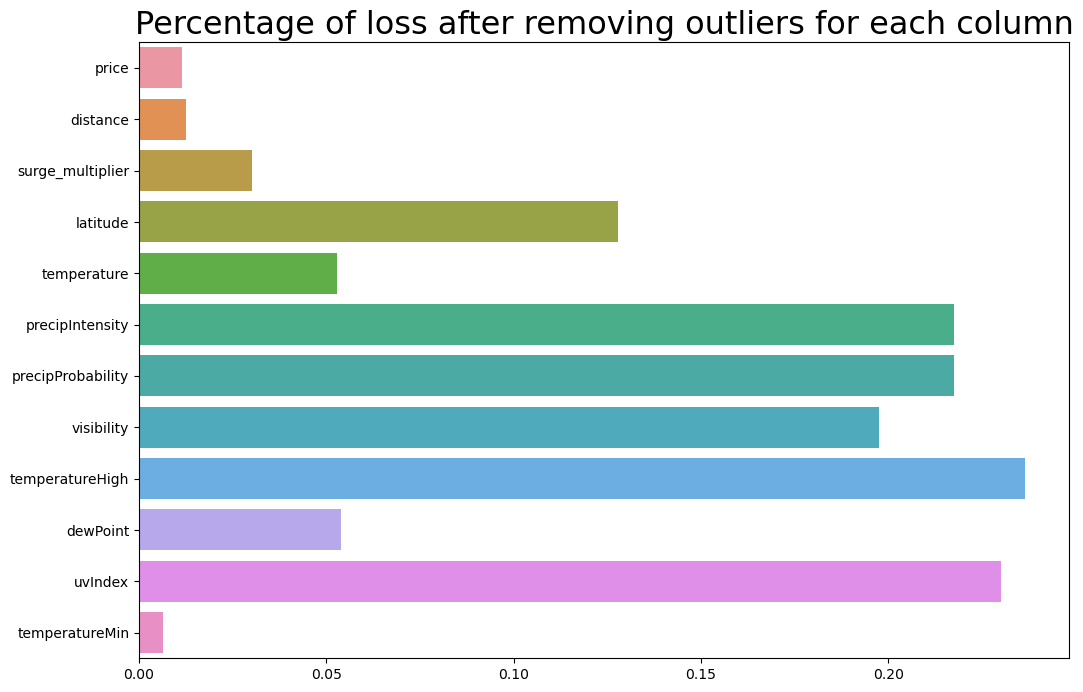

In [22]:
l = list(filter(lambda num: num != 0, l))
l = [i/df.shape[0] for i in l]
plt.figure(figsize = (12,8))
sns.barplot(x=l, y=col_out)
plt.title("Percentage of loss after removing outliers for each column", fontsize=23)
plt.show()

In [23]:
df["price_per_mile"] = df["price"] / df["distance"]

In [24]:
print('Before deleting outliers: ',df.shape)
df.dropna(inplace=True)
print('After deleting outliers: ',df.shape)

Before deleting outliers:  (693071, 42)
After deleting outliers:  (234930, 42)


### Visualization

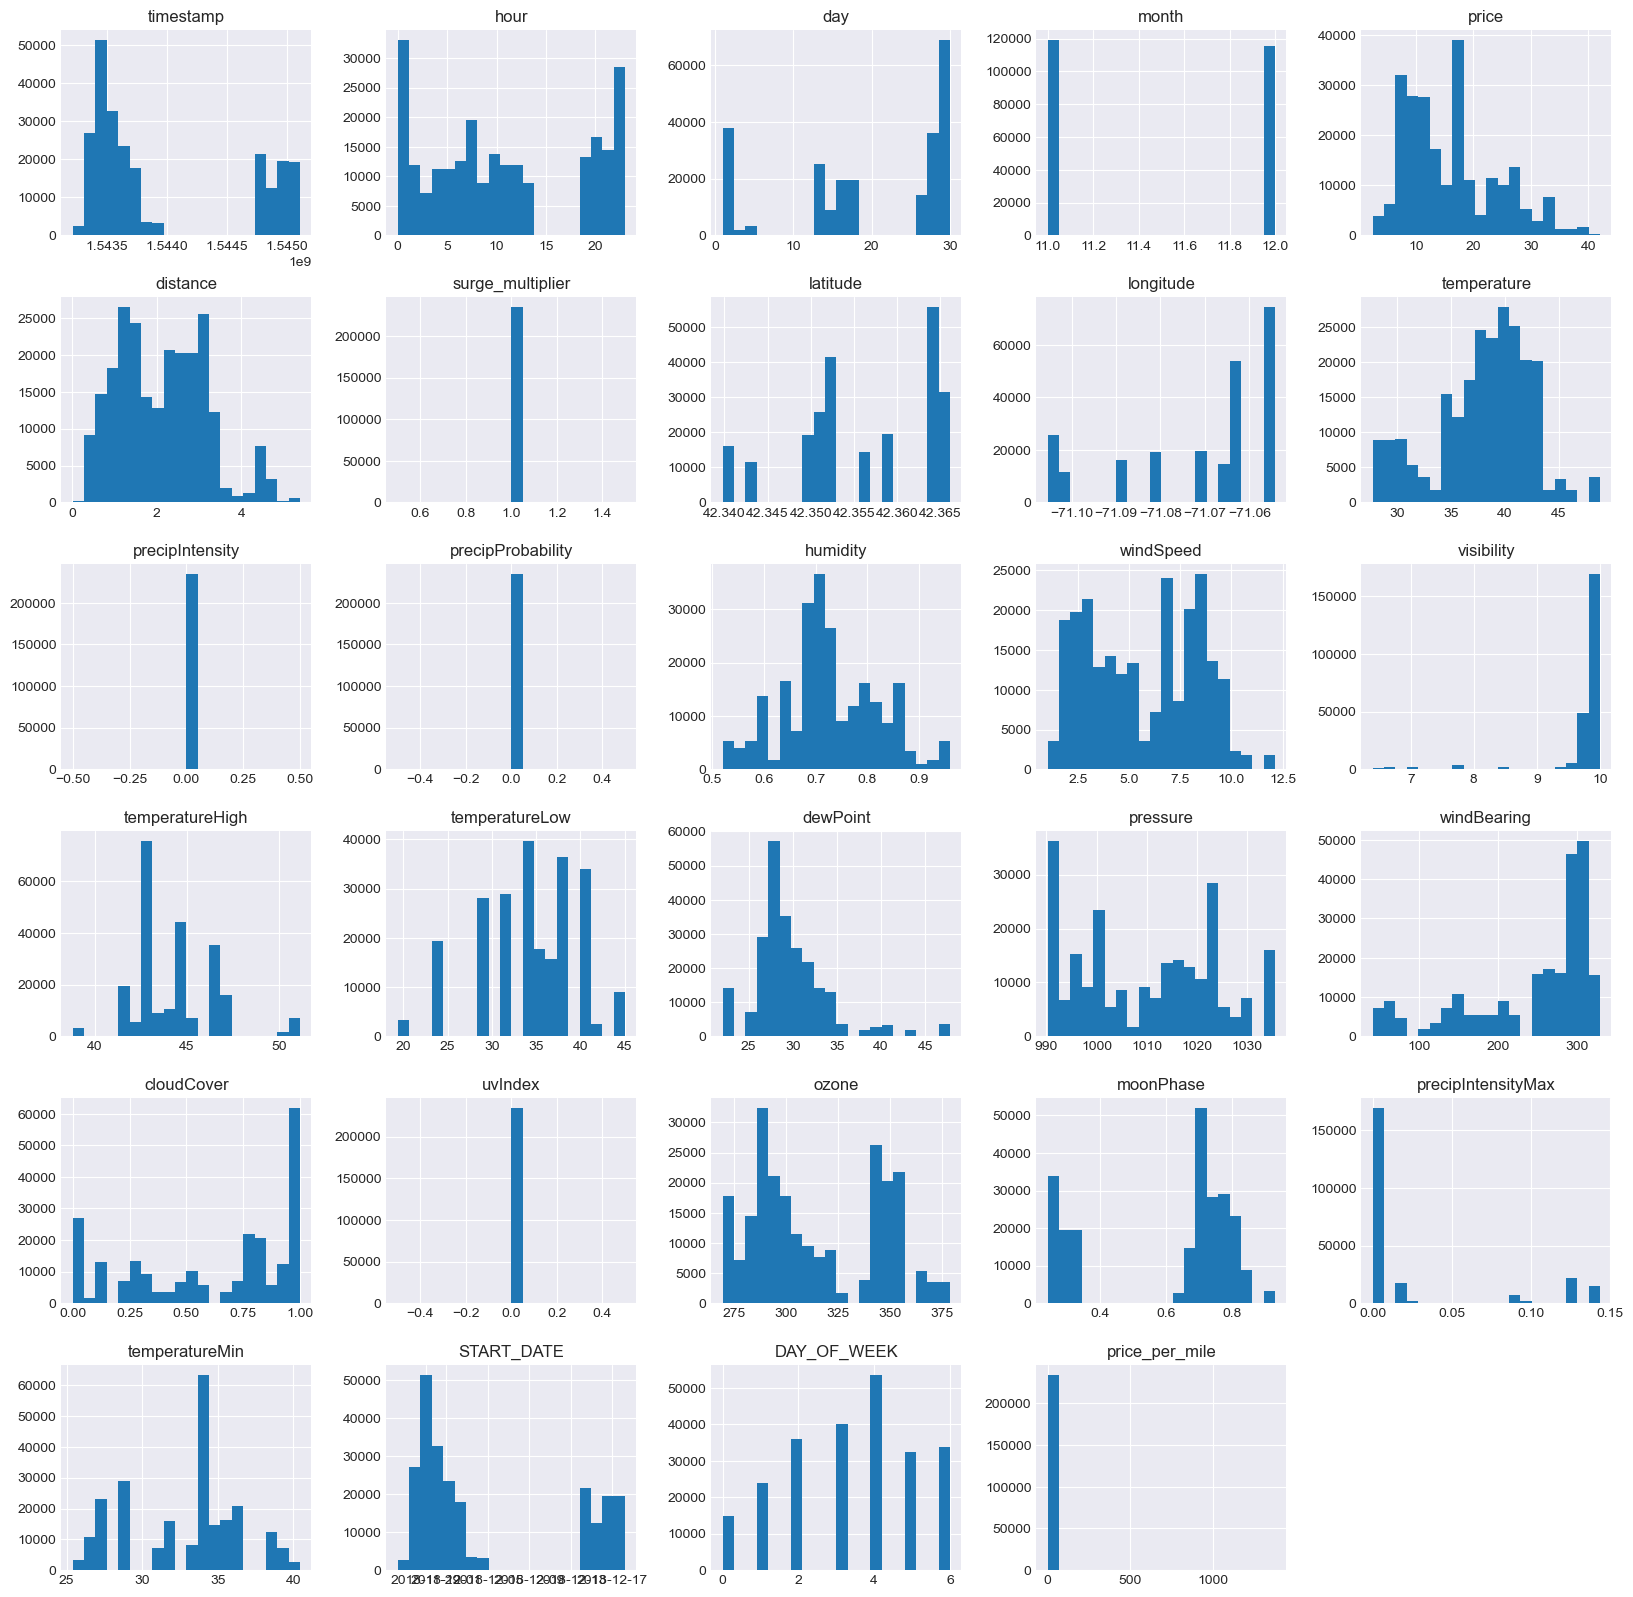

In [25]:
style.use("seaborn-darkgrid")
df.hist(figsize=(20,20), bins=20)
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in df.columns:
    if df[i].dtype == "O":
        df[i] = le.fit_transform(df[i])

### KMEANS Clustering

In [27]:
# Select relevant columns for clustering
columns_for_clustering = ['latitude', 'longitude', 'price', 'distance', 'temperature', 'humidity']

# Extract the data for clustering

cluster_data = df[columns_for_clustering]

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(cluster_data)

# Add cluster labels to the DataFrame
df['cluster_label'] = kmeans.labels_

In [28]:
# Calculate inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 4122790.652568973


### PRECIDTING PRICES USING CATBOOSTREGRESSOR

In [30]:
df.dropna(inplace = True)
X=df.drop(['price',"START_DATE","price_per_mile"],axis=1)
y=df['price_per_mile']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=40)

In [31]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

# Use the Pool constructor
train_data = Pool(X_train, y_train, cat_features=categorical_features_indices)
test_data = Pool(X_test, y_test, cat_features=categorical_features_indices)

C:\Users\sunil\AppData\Local\Temp\ipykernel_19528\2187435708.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X.dtypes != np.float)[0]


In [32]:
model = CatBoostRegressor(depth= 6, l2_leaf_reg= 3, iterations= 1000, learning_rate=0.1)

In [33]:
model.fit(train_data)

0:	learn: 12.8968089	total: 2.66s	remaining: 44m 19s
1:	learn: 12.1803342	total: 5.71s	remaining: 47m 28s
2:	learn: 11.5914075	total: 7.09s	remaining: 39m 16s
3:	learn: 11.0032521	total: 8.7s	remaining: 36m 5s
4:	learn: 10.5366008	total: 10.4s	remaining: 34m 25s
5:	learn: 9.9182967	total: 11.4s	remaining: 31m 35s
6:	learn: 9.4205984	total: 12.9s	remaining: 30m 32s
7:	learn: 9.0195153	total: 13.7s	remaining: 28m 22s
8:	learn: 8.6530522	total: 14.5s	remaining: 26m 32s
9:	learn: 8.2559253	total: 15.4s	remaining: 25m 23s
10:	learn: 8.0007819	total: 16.2s	remaining: 24m 18s
11:	learn: 7.7989586	total: 16.9s	remaining: 23m 14s
12:	learn: 7.5439901	total: 17.8s	remaining: 22m 34s
13:	learn: 7.3902113	total: 19.2s	remaining: 22m 31s
14:	learn: 7.0513301	total: 20.2s	remaining: 22m 6s
15:	learn: 6.8672655	total: 21.1s	remaining: 21m 37s
16:	learn: 6.5165945	total: 22s	remaining: 21m 9s
17:	learn: 6.3645648	total: 22.8s	remaining: 20m 44s
18:	learn: 6.2186440	total: 23.6s	remaining: 20m 18s
19:	

154:	learn: 1.7562826	total: 2m 8s	remaining: 11m 41s
155:	learn: 1.7397844	total: 2m 9s	remaining: 11m 39s
156:	learn: 1.7353074	total: 2m 10s	remaining: 11m 38s
157:	learn: 1.7353060	total: 2m 10s	remaining: 11m 36s
158:	learn: 1.7339451	total: 2m 11s	remaining: 11m 35s
159:	learn: 1.7339020	total: 2m 12s	remaining: 11m 33s
160:	learn: 1.7338597	total: 2m 12s	remaining: 11m 32s
161:	learn: 1.7011884	total: 2m 13s	remaining: 11m 30s
162:	learn: 1.6947799	total: 2m 14s	remaining: 11m 28s
163:	learn: 1.6849298	total: 2m 14s	remaining: 11m 27s
164:	learn: 1.6849276	total: 2m 15s	remaining: 11m 25s
165:	learn: 1.6692430	total: 2m 16s	remaining: 11m 23s
166:	learn: 1.6621349	total: 2m 16s	remaining: 11m 22s
167:	learn: 1.6583353	total: 2m 17s	remaining: 11m 21s
168:	learn: 1.6533788	total: 2m 18s	remaining: 11m 20s
169:	learn: 1.6414248	total: 2m 18s	remaining: 11m 18s
170:	learn: 1.6373519	total: 2m 19s	remaining: 11m 17s
171:	learn: 1.6298398	total: 2m 20s	remaining: 11m 16s
172:	learn: 

306:	learn: 1.2408697	total: 3m 59s	remaining: 9m 1s
307:	learn: 1.2404603	total: 4m	remaining: 9m
308:	learn: 1.2395595	total: 4m 1s	remaining: 8m 59s
309:	learn: 1.2358645	total: 4m 1s	remaining: 8m 58s
310:	learn: 1.2347671	total: 4m 2s	remaining: 8m 57s
311:	learn: 1.2335192	total: 4m 3s	remaining: 8m 56s
312:	learn: 1.2329132	total: 4m 3s	remaining: 8m 54s
313:	learn: 1.2314808	total: 4m 4s	remaining: 8m 54s
314:	learn: 1.2314688	total: 4m 5s	remaining: 8m 52s
315:	learn: 1.2286232	total: 4m 5s	remaining: 8m 52s
316:	learn: 1.2244059	total: 4m 6s	remaining: 8m 51s
317:	learn: 1.2222781	total: 4m 7s	remaining: 8m 50s
318:	learn: 1.2222532	total: 4m 7s	remaining: 8m 49s
319:	learn: 1.2189736	total: 4m 8s	remaining: 8m 48s
320:	learn: 1.2181979	total: 4m 9s	remaining: 8m 47s
321:	learn: 1.2176487	total: 4m 10s	remaining: 8m 46s
322:	learn: 1.2172195	total: 4m 10s	remaining: 8m 45s
323:	learn: 1.2131523	total: 4m 11s	remaining: 8m 44s
324:	learn: 1.2094290	total: 4m 11s	remaining: 8m 

459:	learn: 1.0579327	total: 5m 53s	remaining: 6m 55s
460:	learn: 1.0577367	total: 5m 54s	remaining: 6m 54s
461:	learn: 1.0574704	total: 5m 55s	remaining: 6m 53s
462:	learn: 1.0565852	total: 5m 55s	remaining: 6m 52s
463:	learn: 1.0562173	total: 5m 56s	remaining: 6m 51s
464:	learn: 1.0559182	total: 5m 57s	remaining: 6m 51s
465:	learn: 1.0554846	total: 5m 58s	remaining: 6m 50s
466:	learn: 1.0540644	total: 5m 58s	remaining: 6m 49s
467:	learn: 1.0534847	total: 5m 59s	remaining: 6m 48s
468:	learn: 1.0528600	total: 6m	remaining: 6m 47s
469:	learn: 1.0520209	total: 6m	remaining: 6m 46s
470:	learn: 1.0518707	total: 6m 1s	remaining: 6m 45s
471:	learn: 1.0515552	total: 6m 2s	remaining: 6m 45s
472:	learn: 1.0512265	total: 6m 2s	remaining: 6m 44s
473:	learn: 1.0504111	total: 6m 3s	remaining: 6m 43s
474:	learn: 1.0502096	total: 6m 4s	remaining: 6m 42s
475:	learn: 1.0493375	total: 6m 4s	remaining: 6m 41s
476:	learn: 1.0486218	total: 6m 5s	remaining: 6m 41s
477:	learn: 1.0484041	total: 6m 6s	remainin

612:	learn: 0.9570636	total: 7m 47s	remaining: 4m 55s
613:	learn: 0.9567429	total: 7m 48s	remaining: 4m 54s
614:	learn: 0.9562507	total: 7m 48s	remaining: 4m 53s
615:	learn: 0.9558819	total: 7m 49s	remaining: 4m 52s
616:	learn: 0.9557648	total: 7m 50s	remaining: 4m 51s
617:	learn: 0.9553626	total: 7m 51s	remaining: 4m 51s
618:	learn: 0.9550768	total: 7m 51s	remaining: 4m 50s
619:	learn: 0.9530274	total: 7m 52s	remaining: 4m 49s
620:	learn: 0.9519367	total: 7m 53s	remaining: 4m 48s
621:	learn: 0.9515204	total: 7m 53s	remaining: 4m 48s
622:	learn: 0.9500271	total: 7m 54s	remaining: 4m 47s
623:	learn: 0.9497163	total: 7m 55s	remaining: 4m 46s
624:	learn: 0.9494461	total: 7m 56s	remaining: 4m 45s
625:	learn: 0.9491230	total: 7m 56s	remaining: 4m 44s
626:	learn: 0.9480896	total: 7m 57s	remaining: 4m 44s
627:	learn: 0.9471766	total: 7m 58s	remaining: 4m 43s
628:	learn: 0.9468696	total: 7m 59s	remaining: 4m 42s
629:	learn: 0.9468060	total: 7m 59s	remaining: 4m 41s
630:	learn: 0.9462584	total:

765:	learn: 0.8754793	total: 9m 41s	remaining: 2m 57s
766:	learn: 0.8745771	total: 9m 42s	remaining: 2m 56s
767:	learn: 0.8745299	total: 9m 43s	remaining: 2m 56s
768:	learn: 0.8743834	total: 9m 44s	remaining: 2m 55s
769:	learn: 0.8729740	total: 9m 45s	remaining: 2m 54s
770:	learn: 0.8728429	total: 9m 46s	remaining: 2m 54s
771:	learn: 0.8726462	total: 9m 46s	remaining: 2m 53s
772:	learn: 0.8725320	total: 9m 47s	remaining: 2m 52s
773:	learn: 0.8721350	total: 9m 48s	remaining: 2m 51s
774:	learn: 0.8715798	total: 9m 49s	remaining: 2m 51s
775:	learn: 0.8709373	total: 9m 50s	remaining: 2m 50s
776:	learn: 0.8709259	total: 9m 51s	remaining: 2m 49s
777:	learn: 0.8699526	total: 9m 52s	remaining: 2m 49s
778:	learn: 0.8698573	total: 9m 53s	remaining: 2m 48s
779:	learn: 0.8698108	total: 9m 53s	remaining: 2m 47s
780:	learn: 0.8697575	total: 9m 54s	remaining: 2m 46s
781:	learn: 0.8695745	total: 9m 55s	remaining: 2m 46s
782:	learn: 0.8694195	total: 9m 56s	remaining: 2m 45s
783:	learn: 0.8692917	total:

916:	learn: 0.8257751	total: 11m 44s	remaining: 1m 3s
917:	learn: 0.8256428	total: 11m 45s	remaining: 1m 3s
918:	learn: 0.8255036	total: 11m 46s	remaining: 1m 2s
919:	learn: 0.8254737	total: 11m 46s	remaining: 1m 1s
920:	learn: 0.8252944	total: 11m 47s	remaining: 1m
921:	learn: 0.8250903	total: 11m 48s	remaining: 59.9s
922:	learn: 0.8250501	total: 11m 48s	remaining: 59.1s
923:	learn: 0.8248502	total: 11m 49s	remaining: 58.4s
924:	learn: 0.8246642	total: 11m 50s	remaining: 57.6s
925:	learn: 0.8245112	total: 11m 51s	remaining: 56.8s
926:	learn: 0.8243224	total: 11m 52s	remaining: 56.1s
927:	learn: 0.8242989	total: 11m 52s	remaining: 55.3s
928:	learn: 0.8242390	total: 11m 53s	remaining: 54.5s
929:	learn: 0.8241824	total: 11m 54s	remaining: 53.8s
930:	learn: 0.8240456	total: 11m 54s	remaining: 53s
931:	learn: 0.8232461	total: 11m 55s	remaining: 52.2s
932:	learn: 0.8231787	total: 11m 56s	remaining: 51.4s
933:	learn: 0.8229626	total: 11m 57s	remaining: 50.7s
934:	learn: 0.8229378	total: 11m 

In [34]:
pred = model.predict(X_test)
pred

array([21.51566567,  5.72360516, 13.0068448 , ..., 14.84921766,
        4.20466166,  3.55363207])

In [35]:
y_true =np.array(y_test)

### EVALUATING MODEL

In [36]:
r2 = model.score(test_data) 
rmse = (np.sqrt(mean_squared_error(y_true, pred)))
print("R2:", r2)
print("RMSE:", rmse)

R2: 0.956821754035951
RMSE: 2.9605631176488325
